In [107]:
apikey = 'sS28fU9aZ03yFSpx0QaOSW864llazUDUIr1ShpQroQ6PiVcHRAdFvCLkJB1XMFDX'
secret = 'FNmuJSKqW53yQrWaSxSTF5I1r298xhJQJkkCS38WR7CxeydkBe5N0hfaSu2UBGA8'

In [108]:
#!pip install python-binance pandas mplfinance
#!pip install pandas-datareader


In [109]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import csv
from IPython.display import display
from textblob import TextBlob
%matplotlib inline

Binance API Data

In [110]:
client = Client(apikey, secret)

In [111]:
tickers =client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.07205400'},
 {'symbol': 'LTCBTC', 'price': '0.00273500'},
 {'symbol': 'BNBBTC', 'price': '0.00919200'},
 {'symbol': 'NEOBTC', 'price': '0.00056500'},
 {'symbol': 'QTUMETH', 'price': '0.00250200'},
 {'symbol': 'EOSETH', 'price': '0.00085000'},
 {'symbol': 'SNTETH', 'price': '0.00002201'},
 {'symbol': 'BNTETH', 'price': '0.00081200'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00011910'},
 {'symbol': 'BNBETH', 'price': '0.12760000'},
 {'symbol': 'BTCUSDT', 'price': '47520.00000000'},
 {'symbol': 'ETHUSDT', 'price': '3423.55000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001122'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [112]:
tickers[558]

{'symbol': 'DOGEUSDT', 'price': '0.14560000'}

In [113]:
ticker_df = pd.DataFrame(tickers)

In [114]:
ticker_df.set_index('symbol', inplace=True)

In [115]:
ticker_df.loc['DOGEUSDT']

price    0.14560000
Name: DOGEUSDT, dtype: object

In [116]:
historical = client.get_historical_klines('DOGEUSDT', client.KLINE_INTERVAL_1DAY, '1 jan 2016')

In [117]:
historical


[[1562284800000,
  '0.00449000',
  '0.00460000',
  '0.00355000',
  '0.00387010',
  '1928297660.00000000',
  1562371199999,
  '7506289.39817290',
  18589,
  '858403324.00000000',
  '3336426.01151920',
  '0'],
 [1562371200000,
  '0.00387410',
  '0.00394260',
  '0.00336520',
  '0.00350000',
  '1010744287.00000000',
  1562457599999,
  '3692804.08878380',
  17250,
  '522724122.00000000',
  '1908499.50964960',
  '0'],
 [1562457600000,
  '0.00350400',
  '0.00365000',
  '0.00340000',
  '0.00353770',
  '530613992.00000000',
  1562543999999,
  '1860353.07168390',
  9394,
  '275110757.00000000',
  '965093.40977300',
  '0'],
 [1562544000000,
  '0.00353780',
  '0.00356180',
  '0.00340000',
  '0.00345800',
  '308445688.00000000',
  1562630399999,
  '1078072.00566180',
  4958,
  '159456967.00000000',
  '558024.17586270',
  '0'],
 [1562630400000,
  '0.00346200',
  '0.00358200',
  '0.00335640',
  '0.00345450',
  '253375582.00000000',
  1562716799999,
  '878528.33377630',
  5690,
  '115809520.00000000',

In [118]:
hist_df = pd.DataFrame(historical)

In [119]:
hist_df.head()



,0,1,2,3,4,5,6,7,8,9,10,11
0,1562284800000,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,1562371199999,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,1562371200000,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,1562457599999,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,1562457600000,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,1562543999999,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,1562544000000,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,1562630399999,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,1562630400000,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,1562716799999,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [120]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Time', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore'] 

In [121]:

hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1562284800000,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,1562371199999,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,1562371200000,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,1562457599999,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,1562457600000,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,1562543999999,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,1562544000000,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,1562630399999,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,1562630400000,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,1562716799999,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [122]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')


In [123]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2019-07-05,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,2019-07-05 23:59:59.999000064,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,2019-07-06,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,2019-07-06 23:59:59.999000064,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,2019-07-07,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,2019-07-07 23:59:59.999000064,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,2019-07-08,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,2019-07-08 23:59:59.999000064,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,2019-07-09,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,2019-07-09 23:59:59.999000064,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [124]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Time', 'TB Base Volume', 'TB Quote Volume']

In [125]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)


In [126]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
994,2022-03-25,0.1368,0.1377,0.1274,0.1308,1.191949e+09,2022-03-25 23:59:59.999000064,1.590551e+08,181034,586434204.0,7.828308e+07,0
995,2022-03-26,0.1308,0.1369,0.1289,0.1360,7.803289e+08,2022-03-26 23:59:59.999000064,1.039666e+08,125845,401401612.0,5.347955e+07,0
996,2022-03-27,0.1361,0.1456,0.1354,0.1448,1.864810e+09,2022-03-27 23:59:59.999000064,2.624878e+08,330309,932082936.0,1.312413e+08,0
997,2022-03-28,0.1447,0.1537,0.1406,0.1425,1.905720e+09,2022-03-28 23:59:59.999000064,2.838339e+08,350602,954604398.0,1.422405e+08,0
998,2022-03-29,0.1424,0.1474,0.1420,0.1456,4.052087e+08,2022-03-29 23:59:59.999000064,5.882265e+07,64328,205122911.0,2.977092e+07,0


In [127]:
import mplfinance as mpf

In [128]:
hist_df.set_index('Close Time').tail(1460)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2019-07-05 23:59:59.999000064,2019-07-05,0.004490,0.004600,0.003550,0.003870,1.928298e+09,7.506289e+06,18589,858403324.0,3.336426e+06,0
2019-07-06 23:59:59.999000064,2019-07-06,0.003874,0.003943,0.003365,0.003500,1.010744e+09,3.692804e+06,17250,522724122.0,1.908500e+06,0
2019-07-07 23:59:59.999000064,2019-07-07,0.003504,0.003650,0.003400,0.003538,5.306140e+08,1.860353e+06,9394,275110757.0,9.650934e+05,0
2019-07-08 23:59:59.999000064,2019-07-08,0.003538,0.003562,0.003400,0.003458,3.084457e+08,1.078072e+06,4958,159456967.0,5.580242e+05,0
2019-07-09 23:59:59.999000064,2019-07-09,0.003462,0.003582,0.003356,0.003455,2.533756e+08,8.785283e+05,5690,115809520.0,4.020473e+05,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25 23:59:59.999000064,2022-03-25,0.136800,0.137700,0.127400,0.130800,1.191949e+09,1.590551e+08,181034,586434204.0,7.828308e+07,0
2022-03-26 23:59:59.999000064,2022-03-26,0.130800,0.136900,0.128900,0.136000,7.803289e+08,1.039666e+08,125845,401401612.0,5.347955e+07,0
2022-03-27 23:59:59.999000064,2022-03-27,0.136100,0.145600,0.135400,0.144800,1.864810e+09,2.624878e+08,330309,932082936.0,1.312413e+08,0


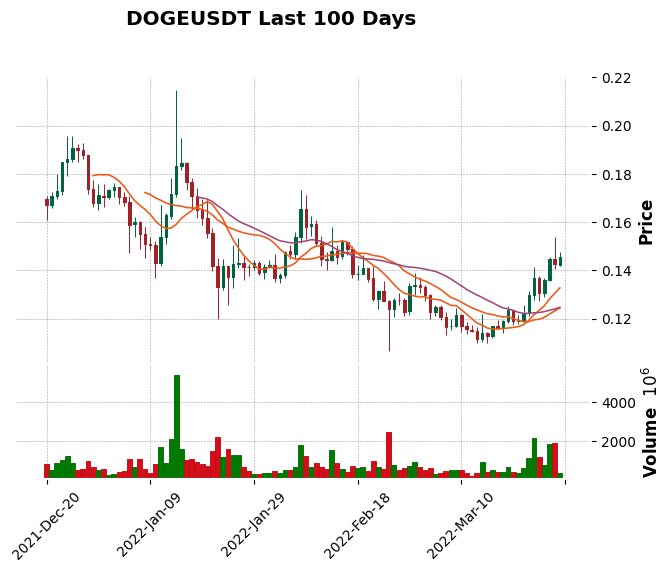

In [129]:
mpf.plot(hist_df.set_index('Open Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='DOGEUSDT Last 100 Days', 
        mav=(10,20,30))

In [130]:
start = dt.datetime(2020,12,1)
end = dt.datetime(2021,11,1)


In [131]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)

doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-01,0.003572,0.003269,0.003551,0.003335,80163603,0.003335
2020-12-02,0.003436,0.003293,0.003335,0.003374,58705661,0.003374
2020-12-03,0.003500,0.003352,0.003375,0.003428,47907032,0.003428
2020-12-04,0.003447,0.003285,0.003429,0.003298,45062222,0.003298
2020-12-05,0.003414,0.003268,0.003297,0.003397,43386583,0.003397
...,...,...,...,...,...,...
2021-10-29,0.306312,0.279771,0.299964,0.287853,5866664030,0.287853
2021-10-30,0.294647,0.259888,0.287764,0.268345,3637334331,0.268345
2021-10-31,0.284707,0.252614,0.269239,0.280244,4224104205,0.280244


In [132]:
start = dt.datetime(2021,5,13)
end = dt.datetime(2021,5,15)

In [133]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-13,0.519461,0.357175,0.392176,0.490374,18663174069,0.490374
2021-05-14,0.589690,0.464622,0.487070,0.559604,20466177002,0.559604
2021-05-15,0.562676,0.491299,0.559668,0.507972,9836892944,0.507972
2021-05-16,0.548145,0.451023,0.507910,0.514895,9541552064,0.514895


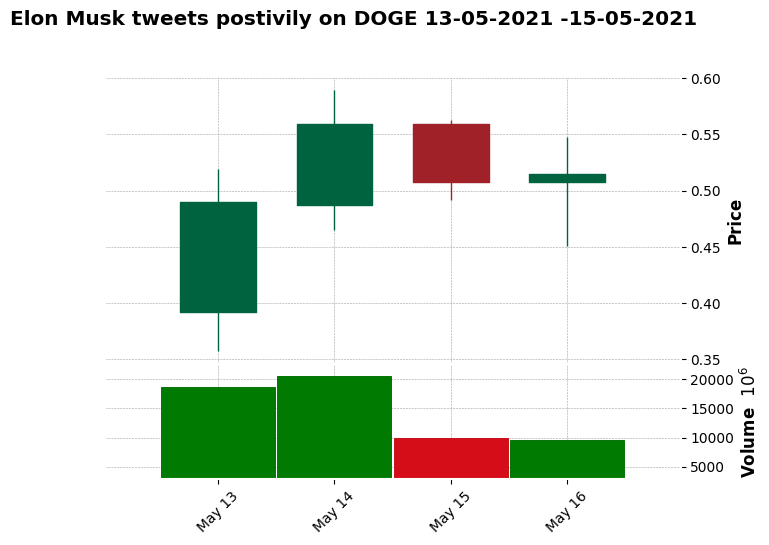

In [134]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk tweets postivily on DOGE 13-05-2021 -15-05-2021  ')

In [135]:
start = dt.datetime(2021,5,9)
end = dt.datetime(2021,5,10)


In [136]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-09,0.697625,0.425706,0.635820,0.570070,46138063928,0.570070
2021-05-10,0.569687,0.421291,0.569687,0.449964,16514521828,0.449964
2021-05-11,0.546651,0.445034,0.450488,0.495231,14566975476,0.495231


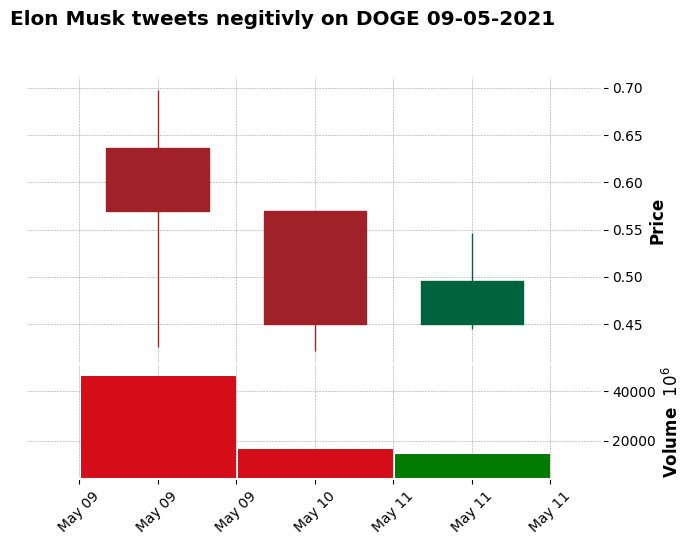

In [137]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk tweets negitivly on DOGE 09-05-2021')

In [138]:
start = dt.datetime(2021,8,9)
end = dt.datetime(2021,9,9)

In [139]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-09,0.266265,0.231410,0.240122,0.256897,4607903346,0.256897
2021-08-10,0.262791,0.245352,0.256366,0.257325,3424415504,0.257325
2021-08-11,0.282482,0.256382,0.257424,0.265263,4732068476,0.265263
2021-08-12,0.294142,0.252775,0.264853,0.263921,5264857508,0.263921
2021-08-13,0.287188,0.261907,0.264249,0.286808,3565092106,0.286808
2021-08-14,0.298456,0.277154,0.286801,0.293113,4677579997,0.293113
2021-08-15,0.348722,0.287063,0.294086,0.341441,8046171669,0.341441
2021-08-16,0.350953,0.310828,0.340165,0.320715,6681324187,0.320715
2021-08-17,0.339462,0.295763,0.319631,0.299442,5699700481,0.299442


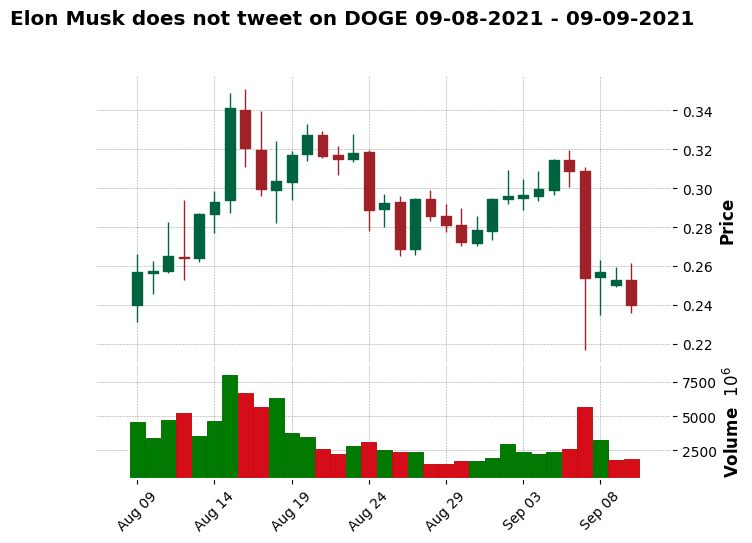

In [140]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk does not tweet on DOGE 09-08-2021 - 09-09-2021')

In [141]:
df = pd.read_csv('Dogecoin Historical Data.csv', usecols=['Date', 'High'])
df['Date'] = pd.to_datetime(df['Date'])
df['Pct change'] = df['High'].pct_change().multiply(100)

tweets_df = pd.read_csv('53tweets.csv', usecols=['Date', 'Tweet', 'Time'])
tweets_df['Offset'] = tweets_df['Time'].apply(lambda time: '1 days' if time.find('pm') > -1 else 0)
tweets_df['Date'] = (pd.to_datetime(tweets_df['Date']) + pd.to_timedelta(tweets_df['Offset']))
data = pd.merge(df, tweets_df, on="Date")

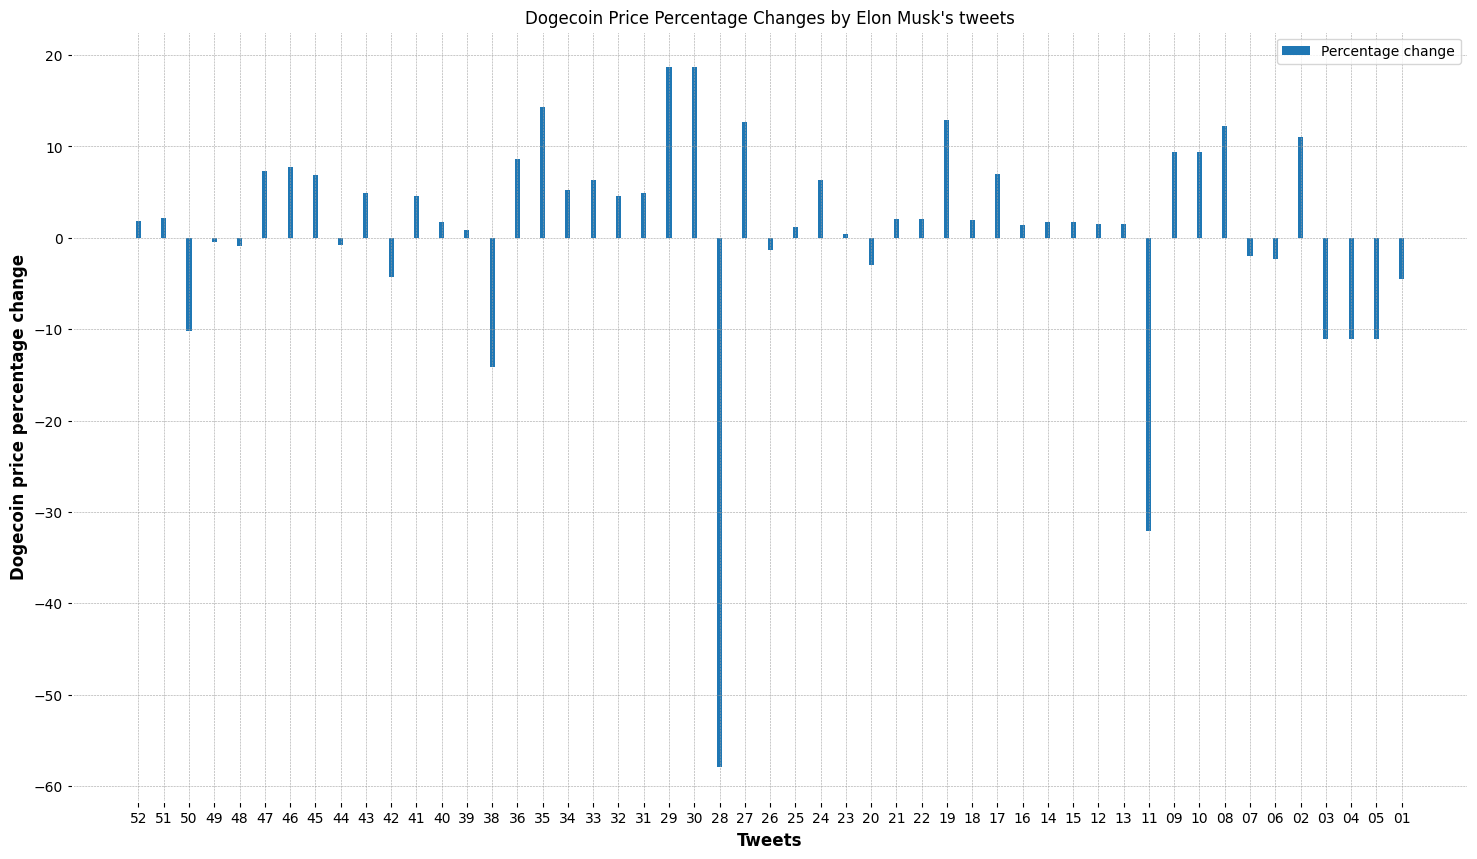

In [142]:
fig, ax = plt.subplots(figsize=(18,10))
width = 0.2
labels = list(map(lambda x: x.replace('tweet', ''), data['Tweet'].values.tolist()))
percentage_change = data['Pct change'].values.tolist()
ax.bar(labels, percentage_change, width, label='Percentage change')
ax.set_ylabel('Dogecoin price percentage change')
ax.set_xlabel('Tweets')
ax. set_title("Dogecoin Price Percentage Changes by Elon Musk's tweets")
ax.legend()
plt.show()

In [143]:
datafile ='53tweets.csv'

In [144]:
raw_data = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)

In [145]:
reindexed_data = raw_data['Tweet']
reindexed_data.index = raw_data['Text']

In [146]:
raw_data.head()


,Tweet,Date,Time,Text
0,tweet01,Dec-02-2017,7:33 pm,"{""Text"":""@highqualitysh1t I love the thought o..."
1,tweet02,Apr-04-2019,10:24 am,"{""Text"":""@Tom_Heats Dogecoin might be my fav c..."
2,tweet03,Apr-02-2019,8:40 pm,"{""Text"":""@dogecoin Uh oh"""
3,tweet04,Apr-02-2019,9:16 pm,"{""Text"":""Dogecoin rulz https://t.co/flWWUgAgLU"""
4,tweet05,Apr-02-2019,9:38 pm,"{""Text"":""Dogecoin value may vary https://t.co/..."


In [147]:
positive_sentence = "dogecoin, doge, dogecoin is for the people, dogecoin is good!"
neutral_sentence = "dogecoin looks okay"
negative_sentence = "dogecoin is bad"

In [148]:
positive_blob = TextBlob(positive_sentence)
neutral_blob = TextBlob(neutral_sentence)
negative_blob = TextBlob(negative_sentence)

In [149]:
print("Positive sentence: ", positive_blob.sentiment)
print("Neutral sentence: ", neutral_blob.sentiment)
print("Negative sentence: ", negative_blob.sentiment)

Positive sentence:  Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Neutral sentence:  Sentiment(polarity=0.5, subjectivity=0.5)
Negative sentence:  Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


Stopwords


In [150]:
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [151]:
# word_tokenize accepts

#stop_words = set(stopwords.words('english'))
#file1 = open('data-clensing.csv', encoding= "UTF-8")

In [152]:
#line = file1.read()
#words = line.split()
#for r in words:
   # if not r in stop_words:
      #  appendFile = open('fstop.txt','a', encoding="utf-8")
      #  appendFile.write(" "+r)
       # appendFile.close()



```
Frequency distabution in Tweets collected 

```



In [153]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist

In [154]:
wt_words = open('fstop.txt', encoding= "UTF-8")
mydata = wt_words.read()
# add individual characters you want to get rid of
for c in "#0123456789£!$%^&*'()""';:-_/?><,.@":
    mydata = mydata.replace(c,"")

for w in ["RT", "date", "http"]:
    mydata = mydata.replace(w, "")


data_analysis = nltk.FreqDist(nltk.tokenize.word_tokenize(mydata))

In [155]:
testString="12333333334566666666"
for c in "123":
    print("Replacing " + c)
    testString = testString.replace(c,"")
print(testString)

Replacing 1
Replacing 2
Replacing 3
4566666666


In [156]:
# Let's take the specific words only if their frequency is greater than 10.
filter_words = dict([(m, n) for m, n in data_analysis.items() if n > 50])

In [157]:
filter_words["dogecoin"]


111075

In [158]:
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))

'': 717496
+: 7965
+Tag: 264
+…: 231
=: 7348
=…: 51
A: 7677
AAVE: 183
ABCD: 327
ABOUT: 378
ABitgert: 75
ADA: 3816
ADABoy: 228
ADDRESS: 650
ADS: 135
ADTX: 186
ADiacosa: 57
AFTER: 77
AGAIN: 84
AGIX: 57
AI: 68
AICLE: 166
AID: 120
AIFICIAL: 117
AINU: 63
AIR: 72
AIRDROP: 379
AIRDROP🐈: 110
AIRPO: 873
AIが描くキャラクターNFTのMonacuteは月日にオークションを開始します！: 330
AJSHIB: 75
AKITA: 1702
AKITAINU: 116
AKITAnetwork: 63
ALGO: 414
ALIEN: 225
ALIENARMY: 219
ALIENINU: 219
ALJras: 57
ALL: 599
ALLINMCDOGE: 125
ALPACA: 186
ALTCOINS: 63
ALTIN: 53
ALTSEASON: 168
ALotfollahy: 126
AM: 416
AMA: 1971
AMAZING: 75
AMC: 4041
AMCTheatres: 551
AMP: 63
AMikulanecs: 63
ANALYSIS: 51
ANC: 51
AND: 3728
ANKR: 156
ANNOUNCEMENT: 90
ANOTHER: 62
ANY: 1002
ANYTHING: 255
AP: 159
APE: 90
APECOIN: 1082
APES: 51
APEX: 134
APY: 274
ARE: 655
ARMY: 132
AS: 173
ASS: 552
ASTROSHOTToken: 207
ASTROZERO: 402
ASTROZERONFT: 378
AT: 1059
ATH: 1118
ATH…: 153
ATLAS: 99
ATM: 167
ATMs: 68
ATOM: 185
ATTENTION: 90
AVA: 66
AVAX: 1875
AVAX=: 138
AXS: 305
AYE: 150

In [159]:
data_analysis

FreqDist({"''": 717496, 'dogecoin': 111075, 'BabyDogeCoin': 79452, 'DogelonMars': 74054, 'DOGE': 65296, '•': 59043, 'Shiba': 58959, 'SHIB': 58010, 'ELON': 56292, 'Inu': 55987, ...})

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28858 (\N{CJK UNIFIED IDEOGRAPH-70BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26367 (\N{CJK UNIFIED IDEOGRAPH-66FF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core

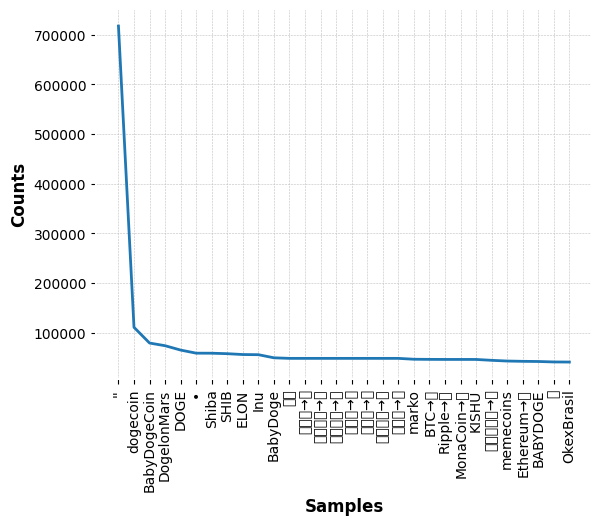

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [160]:
data_analysispost = nltk.FreqDist(filter_words)
 
data_analysispost.plot(30, cumulative=False)


Sentiment Analysis


In [161]:
import numpy as np
import pandas as pd

In [162]:
df = pd.read_csv('data-clensing.csv')

In [163]:
df.shape

(195152, 4)

In [164]:
df.head()

,Date,TweetNo,User,Tweet
0,06/02/2022,1,Filimon1987,RT @hardbitspace: BitTorrent 10000.\nRetweet t...
1,06/02/2022,2,amir_shazrin,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...
2,06/02/2022,3,umit587,RT @fzthsyn: Tercihini hangi kedilerden yana ...
3,06/02/2022,4,realwhalehacker,"""The FTX ad with Brady had some charm, it's cu..."
4,06/02/2022,5,hasanKylp33,RT @fzthsyn: Tercihini hangi kedilerden yana ...


In [165]:
import re 
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
corpus=[df]

for i in range(46256, 5):
  review = re.sub('[^a-zA-Z]', ' ', df['Tweet'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)


In [167]:
corpus

[              Date  TweetNo             User  \
 0       06/02/2022        1      Filimon1987   
 1       06/02/2022        2     amir_shazrin   
 2       06/02/2022        3          umit587   
 3       06/02/2022        4  realwhalehacker   
 4       06/02/2022        5      hasanKylp33   
 ...            ...      ...              ...   
 195147  29/03/2022   195260       XCryptoXav   
 195148  29/03/2022   195261  KripaSh23937899   
 195149  29/03/2022   195262     BabyDogedev1   
 195150  29/03/2022   195263  5KaH5zBfcIRWDBy   
 195151  29/03/2022   195264  5KaH5zBfcIRWDBy   
 
                                                     Tweet  
 0       RT @hardbitspace: BitTorrent 10000.\nRetweet t...  
 1       RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...  
 2       RT @fzthsyn: Tercihini hangi kedilerden yana  ...  
 3       "The FTX ad with Brady had some charm, it's cu...  
 4       RT @fzthsyn: Tercihini hangi kedilerden yana  ...  
 ...                                        

In [168]:
#@okex_brasil

In [169]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
#Sentiment Analysis
SA = SentimentIntensityAnalyzer()
df["Tweet"]= df["Tweet"].astype(str)
# Applying Model, Variable Creation
df['Polarity Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['neu'])
df['Negative Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['neg'])
df['Positive Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['pos'])


# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'



df[:100]
#df.to_csv('Sentimental-data.csv')

,Date,TweetNo,User,Tweet,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,06/02/2022,1,Filimon1987,RT @hardbitspace: BitTorrent 10000.\nRetweet t...,0.0000,1.000,0.000,0.000,Neutral
1,06/02/2022,2,amir_shazrin,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral
2,06/02/2022,3,umit587,RT @fzthsyn: Tercihini hangi kedilerden yana ...,0.0000,1.000,0.000,0.000,Neutral
3,06/02/2022,4,realwhalehacker,"""The FTX ad with Brady had some charm, it's cu...",0.6908,0.769,0.000,0.231,Positive
4,06/02/2022,5,hasanKylp33,RT @fzthsyn: Tercihini hangi kedilerden yana ...,0.0000,1.000,0.000,0.000,Neutral
...,...,...,...,...,...,...,...,...,...
95,06/02/2022,96,E__dollar,RT @shegzynanah: @W3stSideCryp @marvininu @Mar...,0.6597,0.645,0.089,0.266,Positive
96,06/02/2022,97,HamidJahanfakhr,RT @MemesCoinLover: What is the top #Token com...,0.2023,0.899,0.000,0.101,Positive
97,06/02/2022,98,itnyeinchanko,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral
98,06/02/2022,99,rodamus444,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral


In [170]:
df.loc[df['Polarity Score']>0,'Sentiment']
df['Date']= pd.to_datetime(df['Date'])
dfagg=df.groupby(by='Date').agg('mean')
dfagg[dfagg['Polarity Score']<0]
#dfagg2=dfagg.iloc[:,[1]]
#dfagg2.to_csv('dfagg2.csv')
dfagg

,TweetNo,Polarity Score,Neutral Score,Negative Score,Positive Score
Date,,,,,
2022-01-03,55758.833333,0.095867,0.952125,0.006208,0.041667
2022-02-03,59259.500000,0.146020,0.923138,0.011836,0.065003
2022-02-13,15881.000000,0.113200,0.951089,0.006327,0.042584
2022-02-14,17339.500000,0.367391,0.830916,0.033026,0.136046
2022-02-15,18389.994531,0.150535,0.920479,0.016942,0.062586
2022-02-16,19497.500000,0.010105,0.836627,0.079753,0.083547
2022-02-17,20594.500000,0.232539,0.890469,0.026449,0.083085
2022-02-18,21663.000000,0.245144,0.897583,0.024779,0.077641
2022-02-19,22723.594340,0.000168,0.999938,0.000000,0.000062


In [171]:
dfagg2=dfagg.iloc[:,[1]]
#dfagg2.to_csv('dfagg2.csv')
dfagg2

,Polarity Score
Date,
2022-01-03,0.095867
2022-02-03,0.146020
2022-02-13,0.113200
2022-02-14,0.367391
2022-02-15,0.150535
2022-02-16,0.010105
2022-02-17,0.232539
2022-02-18,0.245144
2022-02-19,0.000168


Mering the data from the web scraper and the polarity scores from the daily sentiment


In [172]:
#mergedf = pd.merge(doge, dfagg, on='Date', how='inner')

In [173]:
mergedf = pd.concat([doge, dfagg2], axis=1, sort=True, join='inner')

In [174]:
mergedf

,High,Low,Open,Close,Volume,Adj Close,Polarity Score
Date,,,,,,,


testing web scraper 

In [175]:
start = dt.datetime(2022,3,24)
end = dt.datetime(2022,3,26)

In [176]:
doge = web.DataReader('Mona-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-24,0.981590,0.953585,0.974083,0.954097,489069,0.954097
2022-03-25,0.984148,0.950223,0.954149,0.955652,671498,0.955652
2022-03-26,1.001894,0.954017,0.955664,0.985116,853500,0.985116
2022-03-27,1.008562,0.978913,0.985115,1.008550,463497,1.008550


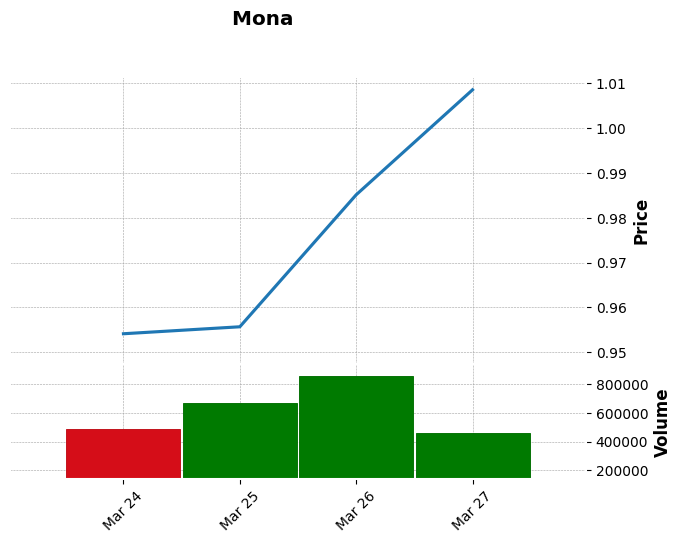

In [177]:
mpf.plot(doge, type = "line" , volume=True, style="charles", title='Mona ')

plotting all the coins respective of the days the data gathered

In [212]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
%matplotlib inline

In [213]:
start = "2022-1-06"
end = '2022-3-29'
doge = yf.download('DOGE-USD',start,end)
mona = yf.download('MONA-USD',start,end)
shib = yf.download('SHIB-USD',start,end)
soma = yf.download('SAMO-USD',start,end)
elon = yf.download('ELON-USD',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Exploratory Analysis

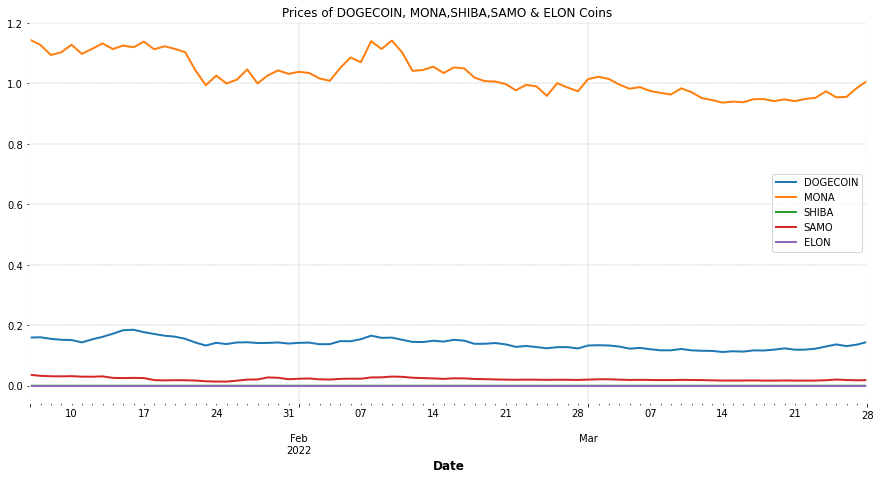

In [214]:
doge['Open'].plot(label = 'DOGECOIN', figsize = (15,7))
mona['Open'].plot(label = 'MONA')
shib['Open'].plot(label = 'SHIBA')
soma['Open'].plot(label = 'SAMO')
elon['Open'].plot(label = 'ELON')
plt.title('Prices of DOGECOIN, MONA,SHIBA,SAMO & ELON Coins ')
plt.legend()

Volume Traded

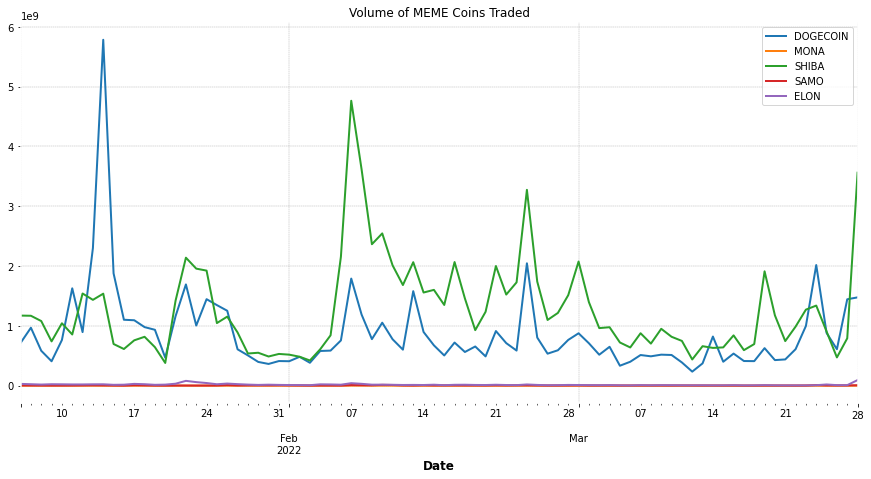

In [215]:
doge['Volume'].plot(label = 'DOGECOIN', figsize = (15,7))
mona['Volume'].plot(label = "MONA")
shib['Volume'].plot(label = 'SHIBA')
soma['Volume'].plot(label = "SAMO")
elon['Volume'].plot(label = 'ELON')
plt.title('Volume of MEME Coins Traded')
plt.legend()

Market Capitalisation

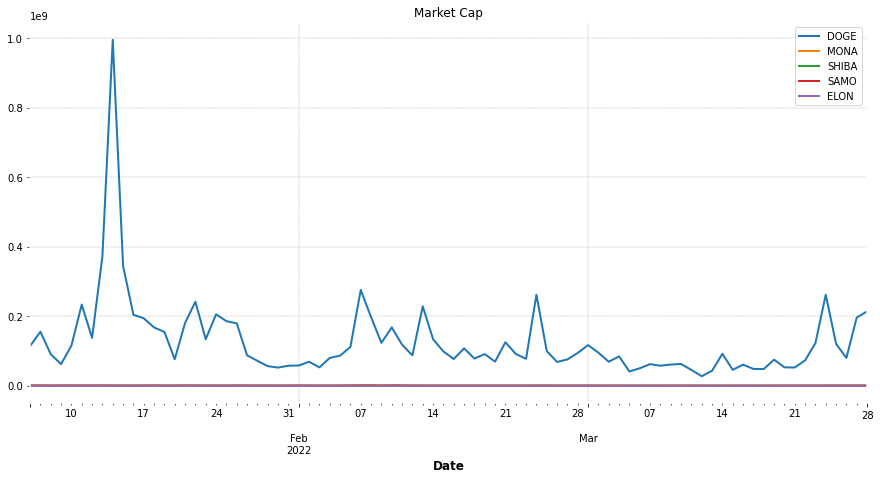

In [216]:
doge['MarktCap'] = doge['Open'] * doge['Volume']
mona['MarktCap'] = mona['Open'] * mona['Volume']
shib['MarktCap'] = shib['Open'] * shib['Volume']
soma['MarktCap'] = soma['Open'] * soma['Volume']
elon['MarktCap'] = elon['Open'] * elon['Volume']
doge['MarktCap'].plot(label = 'DOGE', figsize = (15,7))
mona['MarktCap'].plot(label = 'MONA')
shib['MarktCap'].plot(label = 'SHIBA')
soma['MarktCap'].plot(label = 'SAMO')
elon['MarktCap'].plot(label = 'ELON')
plt.title('Market Cap')
plt.legend()

Moving Average DOGECOIN

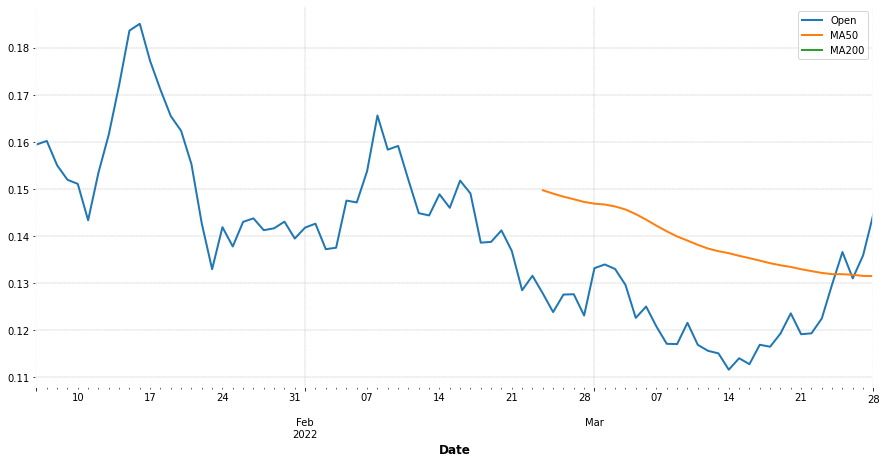

In [217]:
doge['MA50'] = doge['Open'].rolling(50).mean()
doge['MA200'] = doge['Open'].rolling(200).mean()
doge['Open'].plot(figsize = (15,7))
doge['MA50'].plot()
doge['MA200'].plot()
plt.legend()

Percentage increase in Coins value

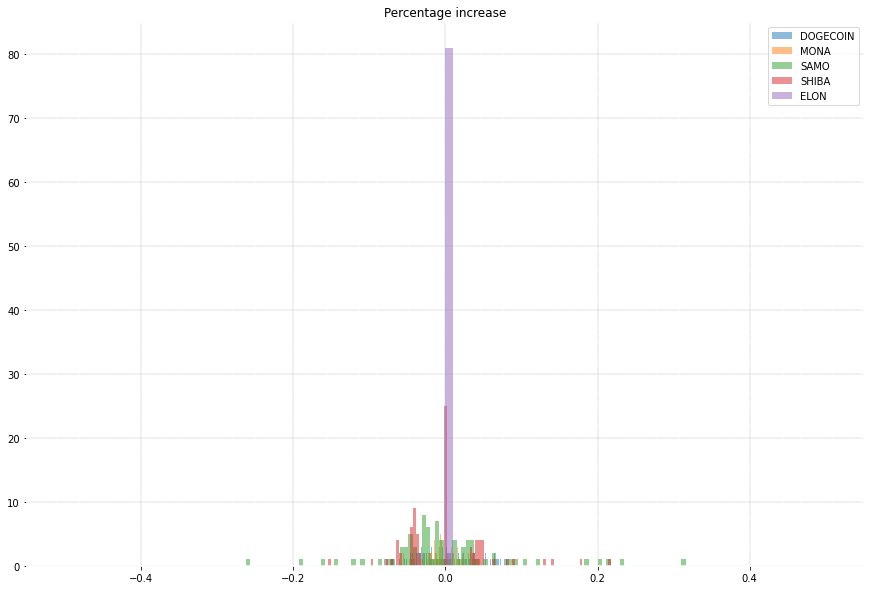

In [218]:
doge['returns'] = (doge['Close']/doge['Close'].shift(1)) -1
mona['returns'] = (mona['Close']/mona['Close'].shift(1))-1
soma['returns'] = (soma['Close']/soma['Close'].shift(1)) - 1
shib['returns'] = (shib['Close']/shib['Close'].shift(1))-1
elon['returns'] = (elon['Close']/elon['Close'].shift(1)) - 1
doge['returns'].hist(bins = 100, label = 'DOGECOIN', alpha = 0.5, figsize = (15,10))
mona['returns'].hist(bins = 100, label = 'MONA', alpha = 0.5)
soma['returns'].hist(bins = 100, label = 'SAMO', alpha = 0.5)
shib['returns'].hist(bins = 100, label = 'SHIBA', alpha = 0.5)
elon['returns'].hist(bins = 100, label = 'ELON', alpha = 0.5)
plt.title('Percentage increase')
plt.legend()

LSTM testing 

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader.data as web

In [186]:
Doge = web.DataReader('DOGE-USD','yahoo',start ='2019-01-01',end = '2022-03-29')

In [187]:
Doge.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-25,0.137275,0.128782,0.136603,0.131013,882486375,0.131013
2022-03-26,0.136495,0.129878,0.131010,0.135868,610401998,0.135868
2022-03-27,0.144858,0.135703,0.135900,0.144732,1445019558,0.144732
2022-03-28,0.152737,0.142457,0.144725,0.142657,1476875507,0.142657
2022-03-29,0.147119,0.142735,0.143025,0.145819,1163353600,0.145819


In [188]:
Doge.shape

(1184, 6)

In [189]:
data = Doge.to_csv('LSTMdoge.csv')


In [190]:
data = pd.read_csv('LSTMdoge.csv',date_parser = True)


In [191]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1179,2022-03-25,0.137275,0.128782,0.136603,0.131013,882486375,0.131013
1180,2022-03-26,0.136495,0.129878,0.131010,0.135868,610401998,0.135868
1181,2022-03-27,0.144858,0.135703,0.135900,0.144732,1445019558,0.144732
1182,2022-03-28,0.152737,0.142457,0.144725,0.142657,1476875507,0.142657
1183,2022-03-29,0.147119,0.142735,0.143025,0.145819,1163353600,0.145819


In [192]:
data.shape


(1184, 7)

In [193]:
data_training = data[data['Date']<'2022-01-01'].copy()
data_test = data[data['Date']>='2022-01-01'].copy()

In [194]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [195]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[1.05984740e-03, 1.77123551e-03, 1.17448021e-03, 1.25139055e-03,
        7.99973571e-05],
       [1.14952685e-03, 1.85361841e-03, 1.23568154e-03, 1.27334460e-03,
        8.93728415e-05],
       [1.08974044e-03, 1.82725602e-03, 1.25899612e-03, 1.20455487e-03,
        8.36644198e-05],
       ...,
       [2.38774111e-01, 2.72709292e-01, 2.51442241e-01, 2.43293720e-01,
        1.16978179e-02],
       [2.36643540e-01, 2.70437170e-01, 2.42760405e-01, 2.48486619e-01,
        8.46445733e-03],
       [2.35995401e-01, 2.73610573e-01, 2.47394206e-01, 2.47290844e-01,
        9.11547547e-03]])

In [196]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [197]:
X_train.shape

(1036, 60, 5)

In [198]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [199]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [200]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 60)            15840     
                                                                 
 dropout_4 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [201]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=1, batch_size=32)

33/33 [==============================] - 8s 119ms/step - loss: 0.0164


In [202]:
data_test.head()

,Date,High,Low,Open,Close,Volume,Adj Close
1096,2022-01-01,0.173423,0.170353,0.170510,0.173035,371336089,0.173035
1097,2022-01-02,0.175989,0.171201,0.173027,0.174403,391041933,0.174403
1098,2022-01-03,0.174406,0.168271,0.174406,0.170088,505900382,0.170088
1099,2022-01-04,0.172339,0.168128,0.170151,0.168803,541922892,0.168803
1100,2022-01-05,0.170747,0.151898,0.168835,0.159420,994086848,0.159420


In [203]:
past_60_days = data_test.tail(60)

In [204]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,0.143984,0.141480,0.141649,0.143056,397610776
1,0.143515,0.138754,0.143057,0.139471,363976741
2,0.142264,0.136853,0.139469,0.141805,412307174
3,0.144129,0.141125,0.141805,0.142631,409432267
4,0.145253,0.136918,0.142626,0.137235,483194691


In [205]:
inputs = scaler.transform(df)
inputs

array([[0.19345205, 0.23105643, 0.20416284, 0.20712927, 0.00555914],
       [0.19281478, 0.2265649 , 0.20621455, 0.20188219, 0.00507449],
       [0.19111494, 0.22343269, 0.20098621, 0.20529827, 0.0057709 ],
       [0.19364906, 0.2304715 , 0.20439016, 0.20650722, 0.00572948],
       [0.19517634, 0.22353979, 0.20558651, 0.19860956, 0.00679235],
       [0.18633613, 0.22131051, 0.19769884, 0.19905742, 0.0053559 ],
       [0.19835451, 0.22408683, 0.19815055, 0.21363796, 0.00819794],
       [0.20181669, 0.23753174, 0.21273684, 0.21310812, 0.00828827],
       [0.20811462, 0.23728128, 0.21216417, 0.22281043, 0.0107378 ],
       [0.23095706, 0.24796307, 0.22187332, 0.24009278, 0.02564229],
       [0.22764028, 0.25120566, 0.23907232, 0.22959429, 0.01697871],
       [0.21617083, 0.25339048, 0.22850926, 0.23064516, 0.01105   ],
       [0.21580803, 0.24756106, 0.22965752, 0.22005736, 0.01501203],
       [0.20715534, 0.23413592, 0.21909303, 0.2097506 , 0.01102205],
       [0.19756778, 0.23138267, 0.

In [206]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((88, 60, 5), (88,))

In [207]:
y_pred = regressor.predict(X_test)

In [208]:
scaler.scale_

array([1.35877872e+00, 1.64766088e+00, 1.45717154e+00, 1.46361450e+00,
       1.44094570e-11])

In [209]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [210]:
y_pred = y_pred*scale
y_test = y_test*scale

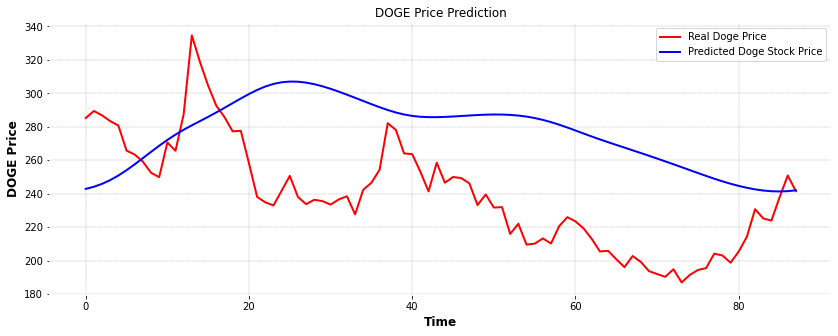

In [211]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Doge Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Doge Stock Price')
plt.title('DOGE Price Prediction')
plt.xlabel('Time')
plt.ylabel('DOGE Price')
plt.legend()
plt.show()